In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

### In this task I need to compare Gradient boosting and Random forest classification models, to find out best learning rate for GradientBoostingClassifier and visualise loss in test and train sample

In [3]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp((-1)*x))

In [5]:
data = pd.read_csv('gbm-data.csv')

In [6]:
y = np.array(data.Activity)
X = np.array(data.drop('Activity', axis=1))

### Split sample into test and train

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

### Count log_loss with GradientBoostingClassifier model

In [10]:
log_loss_train = dict()
log_loss_test = dict()
for iter_ler_rate in [1.0, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate=iter_ler_rate)
    clf.fit(X_train, y_train)
    log_loss_train[str(iter_ler_rate)] = [log_loss(y_train, sigmoid(y_pred)) for y_pred in clf.staged_decision_function(X_train)]
    log_loss_test[str(iter_ler_rate)] = [log_loss(y_test, sigmoid(y_pred)) for y_pred in clf.staged_decision_function(X_test)]

### Count log_loss with RandomForestClassifier model

In [16]:
clf = RandomForestClassifier(n_estimators=36, random_state=241)
clf.fit(X_train, y_train)
y_pred_test = clf.predict_proba(X_test)
log_loss_test_forest = log_loss(y_test, y_pred_test)

### Plotting graphs

1.0 0.5822942594278475 0
0.5 0.5584259973942154 6
0.3 0.5432835808866866 10
0.2 0.5301645204906471 36
0.1 0.5259049090698129 51


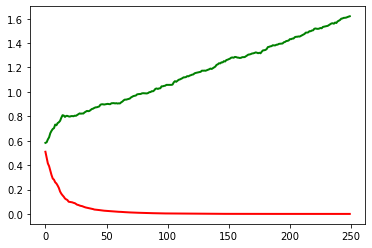

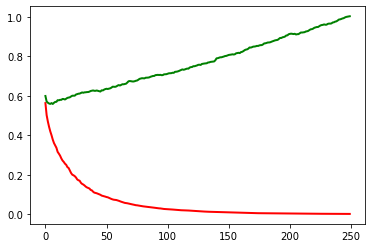

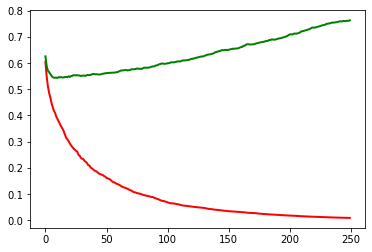

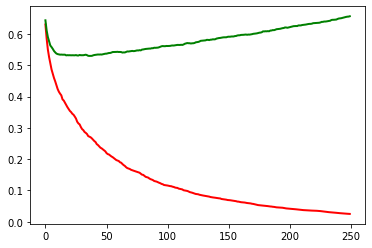

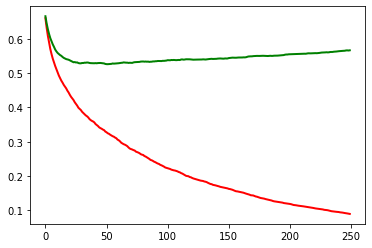

In [11]:
for i in log_loss_train.keys():
    plt.figure()
    plt.plot(log_loss_train[i], 'r', linewidth=2)
    plt.plot(log_loss_test[i], 'g', linewidth=2)    
    print(i, min(log_loss_test[i]), log_loss_test[i].index(min(log_loss_test[i])))

### In this exact task trained GradientBoostingClassifier loss is less than RandomForestClassifier loss
### Best learning rate is 0.2